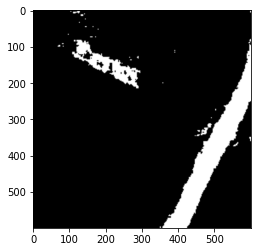

In [27]:
import cv2
import numpy
import matplotlib.pyplot as plt

imgpred = cv2.imread(r"C:\Users\john\Downloads\AutoMap\IoU\infer3.png") #open image prediction
plt.imshow(cv2.cvtColor(imgpred, cv2.COLOR_BGR2RGB)) #show image

imgground = cv2.imread(r"C:\Users\john\Downloads\AutoMap\IoU\original3.png") #open image ground
#plt.imshow(cv2.cvtColor(imgground, cv2.COLOR_BGR2RGB)) #show image


imagen 0 IoU: 0.48
imagen 1 IoU: 0.35
imagen 2 IoU: 0.79
imagen 3 IoU: 0.36
mIoU is: 0.494
El numero de imagenes procesadas fue de: 4


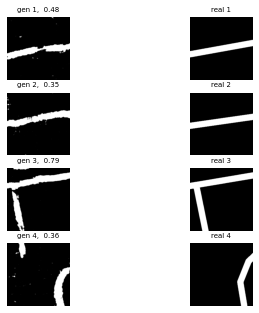

In [25]:
# Este codigo calcula el IOU de un test dataset compuesto por dos folders (generado y real) y de cada una de las imagenes

import cv2
import numpy
import matplotlib.pyplot as plt
import os
import re
import datetime

# An example of prediction
path = r'C:\\Users\\JHON\\Downloads\\AutoMap\\IoU\\256\\NRVARIBDSM_Gen\\'
path2 = r'C:\\Users\\JHON\\Downloads\\AutoMap\\IoU\\256\\NRVARIBDSM_Real\\'
base_dir = 'C:/Users/JHON/Downloads/AutoMap/IoU/256/'
fig_name = base_dir+'mIoU_NRVARIBDSM.png'

bb_points = [[0, 0], [256, 0], [256, 256], [0, 256]]
color = [255, 255, 255]
contours = [numpy.array(bb_points)]
contador = 0
iou = 0

lst1 = []
lst2 = []

now = datetime.datetime.now()

for count, filename in enumerate(sorted(os.listdir(path))):
    (lst1.append(filename))
    #lst1.sort(key=lambda f: int(filter(str.isdigit, f)))
    lst1.sort(key=lambda f: int(re.sub('\D', '', f)))
    #print(lst1)

for count, filename in enumerate(sorted(os.listdir(path2))):
    (lst2.append(filename))
    #lst2.sort(key=lambda f: int(filter(str.isdigit, f)))
    lst2.sort(key=lambda f: int(re.sub('\D', '', f)))
    #print(lst2)

for i in range(0,len(lst1)):
    # abre las imagenes generadas y realiza los calculos sobre ellas
    #print(path + str(lst1[i]))
    imgpred = cv2.imread(path + str(lst1[i]), cv2.IMREAD_GRAYSCALE)
    stencil1 = numpy.zeros(imgpred.shape).astype(imgpred.dtype)
    cv2.fillPoly(stencil1, contours, color)
    result1 = cv2.bitwise_and(imgpred, stencil1)
    result1 = cv2.cvtColor(result1, cv2.COLOR_BGR2RGB)
    
    # abre las imagenes reales y realiza los calculos sobre ellas
    #print(path2 + str(lst2[i]))
    imgground = cv2.imread(path2 + str(lst2[i]), cv2.IMREAD_GRAYSCALE)
    stencil2 = numpy.zeros(imgground.shape).astype(imgground.dtype)
    cv2.fillPoly(stencil2, contours, color)
    result2 = cv2.bitwise_and(imgground, stencil2)
    result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
    
    # IoU calculation
    intersection = numpy.logical_and(result1, result2)
    union = numpy.logical_or(result1, result2)
    iou_score = numpy.sum(intersection) / numpy.sum(union)
    print('imagen', contador, 'IoU: %s' % round(iou_score,2))
    iou = (iou + iou_score)
   
    
    # creates a log file to be readed on panda with values regarding mIoU
    if (i == 0):
        mylog = open(base_dir + "mIoU_log_NRVARIBDSM.log", "a")
        mylog.write('date' + ',' + 'step' + ',' + 'samples' + ',' + 'iou_score' + ',' + 'mIoU' + ',' +'epoch' + '\n')
        mylog.write(str(now)+','+str(i+1)+','+str((i+1))+','+str(round(iou_score,3))+','+str(round(iou/(contador+1),2))+','+(((str(lst1[i])).replace('generated_on_epoch_','')).replace('.png',''))[:-9]+'\n')
        mylog.close()
    else:
        now = datetime.datetime.now()
        mylog = open(base_dir + "mIoU_log_NRVARIBDSM.log", "a")
        mylog.write(str(now)+','+str(i+1)+','+str((i+1))+','+str(round(iou_score,3))+','+str(round(iou/(contador+1),2))+','+(((str(lst1[i])).replace('generated_on_epoch_','')).replace('.png',''))[:-9]+'\n')        
        mylog.close()
    
    # plot generated images
    plt.subplot(11, 2, 1 + 2*i)
    plt.axis('off')
    #plt.title('generated_%4d' % iou_score, fontsize=7)
    plt.title('gen%2d' % (i+1) + ',  ' + str(round(iou_score,2)), fontsize=7)
    #plt.figure(figsize=(1,1))
    plt.imshow(result1)
    
    # plot real images
    plt.subplot(11, 2, 2 + 2*i)
    plt.axis('off')
    plt.title('real%2d' % (i+1), fontsize=7)
    #plt.figure(figsize=(1,1))
    plt.imshow(result2)
    
    contador += 1

myfigure = os.path.join(base_dir, 'model_epoch_{}.png'.format((i+1)*10))
#myfigure = os.path.join(base_dir, 'mIoU_{}.png'.format(path[-5])
#plt.title('Generated vs real')
plt.rcParams["figure.figsize"]=(6, 15)
plt.savefig(fig_name, dpi=300)
#plt.savefig(myfigure, figsize=(100, 50), dpi=300)
#plt.close()
#print('>Saved: ', myfigure)
iou = iou/len(lst1)
print('mIoU is: %s' % round(iou,3))    
print("El numero de imagenes procesadas fue de:", contador)


In [ ]:
# MIOU NRGDSM CON 36 IMAGENES DE TEST = 0.521

mIoU is: 0.909

mIoU is: 0.43 at 1500x1500

1.png IoU: 0.52
2.png IoU: 0.06
3.png IoU: 0.04
4.png IoU: 0.07
1.png IoU: 0.06
2.png IoU: 0.4
3.png IoU: 0.03
4.png IoU: 0.08
1.png IoU: 0.03
2.png IoU: 0.07
3.png IoU: 0.27
4.png IoU: 0.07
1.png IoU: 0.04
2.png IoU: 0.05
3.png IoU: 0.03
4.png IoU: 0.42
IoU: 0.14
No. Images: 16


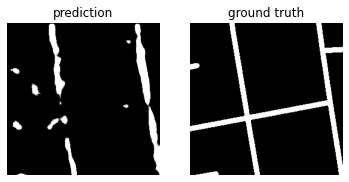

In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt
import os

# imagenes of prediction
#path = r"C:\Users\john\Downloads\AutoMap\IoU\250\generado"
#path = r"C:\Users\john\Downloads\AutoMap\IoU\build"
#path = r"C:\Users\john\Downloads\AutoMap\IoU\test500"
#path = r"C:\Users\john\Downloads\AutoMap\IoU\test250"
#path = r"C:\Users\john\Downloads\AutoMap\IoU\Mass_build"
#path = r"C:\Users\john\Downloads\AutoMap\IoU\1500"
path = r"C:\Users\john\Downloads\AutoMap\IoU\1500low2up\gen"

#imagenes reales
#path2 = r"C:\Users\john\Downloads\AutoMap\IoU\250\real"
#path2 = r"C:\Users\john\Downloads\AutoMap\IoU\build_label"
#path2 = r"C:\Users\john\Downloads\AutoMap\IoU\500"
#path2 = r"C:\Users\john\Downloads\AutoMap\IoU\250"
#path2 = r"C:\Users\john\Downloads\AutoMap\IoU\Mass_build_label"
#path2 = r"C:\Users\john\Downloads\AutoMap\IoU\1500_label"
path2 = r"C:\Users\john\Downloads\AutoMap\IoU\1500low2up\real"


#first_bb_points = [[0, 0], [600, 0], [600, 600], [0, 600]]
bb_points = [[0, 0], [256, 0], [256, 256], [0, 256]]
color = [255, 255, 255]
contours = [numpy.array(bb_points)]
count = 0
iou = 0

for filename in (os.listdir(path)):
    #print(filename.split('.')[-1])
    if (filename.split('.')[-1]) == 'png':
        #img = Image.open(path + '\\' + filename)
        imgpred = cv2.imread(path + '\\' + filename, cv2.IMREAD_GRAYSCALE)
        stencil1 = numpy.zeros(imgpred.shape).astype(imgpred.dtype)
        cv2.fillPoly(stencil1, contours, color)
        result1 = cv2.bitwise_and(imgpred, stencil1)
        result1 = cv2.cvtColor(result1, cv2.COLOR_BGR2RGB)
        #plt.imshow(result1)

# An example of ground truth
#second_bb_points = [[0, 0], [256, 0], [256, 256], [0, 256]]
#second_bb_points = [[0, 0], [600, 0], [600, 600], [0, 600]]
#contours = [numpy.array(bb_points)]
#color = [255, 255, 255]
    for filename in (os.listdir(path2)):
        #print(filename.split('.')[-1])
        if (filename.split('.')[-1]) == 'png':
            imgground = cv2.imread(path2 + '\\' + filename, cv2.IMREAD_GRAYSCALE)
            stencil2 = numpy.zeros(imgground.shape).astype(imgground.dtype)
            cv2.fillPoly(stencil2, contours, color)
            result2 = cv2.bitwise_and(imgground, stencil2)
            result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
            #plt.imshow(result2)
            plt.subplot(1, 2, 1)
            plt.imshow(result1, cmap='gray')
            plt.title('prediction')
            plt.axis('off')
            plt.subplot(1, 2, 2)
            plt.imshow(result2, cmap='gray')
            plt.title('ground truth')
            plt.axis('off')
        
            # IoU calculation
            intersection = numpy.logical_and(result1, result2)
            union = numpy.logical_or(result1, result2)
            iou_score = numpy.sum(intersection) / numpy.sum(union)
            count += 1
            print(filename, 'IoU: %s' % round(iou_score,2))
            iou = (iou + iou_score)
iou = iou/count
print('IoU: %s' % round(iou,2))    
print("No. Images:", count)


In [ ]:
256, 0.39
1024, 0.44 con 1500 px, iou 0.49, con 329 examples; iou=0.45
512, 0.65

In [2]:
# Este codigo calcula el IOU de un test dataset compuesto por dos folders (generado y real) y de cada una de las imagenes
# Este codigo no produce imagenes ni figuras, ese codigo está arriba, este está enfocado en producir el log para verlo
# en pandas y graficar el mejor modelo

import cv2
import numpy
import matplotlib.pyplot as plt
import os
import re
import datetime

# An example of prediction
#path = r'C:\\Users\\john\\Downloads\\AutoMap\\IoU\\250\\generado\\'
#path2 = r'C:\\Users\\john\\Downloads\\AutoMap\\IoU\\250\\real\\'
path = r'C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\'
path2 = r'C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\'
base_dir = 'C:/Users/john/Downloads/AutoMap/IoU/500/'

bb_points = [[0, 0], [256, 0], [256, 256], [0, 256]]
color = [255, 255, 255]
contours = [numpy.array(bb_points)]
contador = 0
iou = 0

lst1 = []
lst2 = []

for count, filename in enumerate(sorted(os.listdir(path))):
    (lst1.append(filename))
    #lst1.sort(key=lambda f: int(filter(str.isdigit, f)))
    lst1.sort(key=lambda f: int(re.sub('\D', '', f)))
    #print(lst1)

for count, filename in enumerate(sorted(os.listdir(path2))):
    (lst2.append(filename))
    #lst2.sort(key=lambda f: int(filter(str.isdigit, f)))
    lst2.sort(key=lambda f: int(re.sub('\D', '', f)))
    #print(lst2)

for i in range(0,len(lst1)):
    # abre las imagenes generadas y realiza los calculos sobre ellas
    print(path + str(lst1[i]))
    imgpred = cv2.imread(path + str(lst1[i]), cv2.IMREAD_GRAYSCALE)
    stencil1 = numpy.zeros(imgpred.shape).astype(imgpred.dtype)
    cv2.fillPoly(stencil1, contours, color)
    result1 = cv2.bitwise_and(imgpred, stencil1)
    result1 = cv2.cvtColor(result1, cv2.COLOR_BGR2RGB)
    
    # abre las imagenes reales y realiza los calculos sobre ellas
    print(path2 + str(lst2[i]))
    imgground = cv2.imread(path2 + str(lst2[i]), cv2.IMREAD_GRAYSCALE)
    stencil2 = numpy.zeros(imgground.shape).astype(imgground.dtype)
    cv2.fillPoly(stencil2, contours, color)
    result2 = cv2.bitwise_and(imgground, stencil2)
    result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
    
    # IoU calculation
    intersection = numpy.logical_and(result1, result2)
    union = numpy.logical_or(result1, result2)
    iou_score = numpy.sum(intersection) / numpy.sum(union)
    print('imagen', contador, 'IoU: %s' % round(iou_score,2))
    iou = iou + iou_score
    
    # creates a log file to be readed on panda with values regarding mIoU
    if (i == 0):
        now = datetime.datetime.now()
        mylog = open(base_dir + "mIoU_log.log", "a")
        mylog.write('date' + ',' + 'step' + ',' + 'sample' + ',' + 'iou_score' + ',' + 'mIoU' + ',' +'epoch' + '\n')
        mylog.write(str(now)+','+str(i+1)+','+(str(lst1[i])[:-13]).replace('_',' ').strip().replace('generated ','')+','+str(round(iou_score,3))+','+str(round(iou/(contador+1),2))+','+(str(lst1[i])[-13:]).replace('_',' ').replace('.png','').strip().replace('epoch ','')+'\n')
        mylog.close()
    else:
        now = datetime.datetime.now()
        mylog = open(base_dir + "mIoU_log.log", "a")
        mylog.write(str(now)+','+str(i+1)+','+(str(lst1[i])[:-13]).replace('_',' ').strip().replace('generated ','')+','+str(round(iou_score,3))+','+str(round(iou/(contador+1),2))+','+(str(lst1[i])[-13:]).replace('_',' ').replace('.png','').strip().replace('epoch ','')+'\n')        
        mylog.close()
    
    # plot generated images
    ##plt.subplot(10, 2, 1 + 2*i)
    ##plt.axis('off')
    #plt.title('generated_%4d' % iou_score, fontsize=7)
    ##plt.title('generated%2d' % (i+1) + ';  ' + str(round(iou_score,2)), fontsize=7)
    #plt.figure(figsize=(1,1))
    ##plt.imshow(result1)
    
    # plot real images
    ##plt.subplot(10, 2, 2 + 2*i)
    ##plt.axis('off')
    ##plt.title('real%2d' % (i+1), fontsize=7)
    #plt.figure(figsize=(1,1))
    ##plt.imshow(result2)
    
    contador += 1

##myfigure = os.path.join(base_dir, 'model_epoch_{}.png'.format((i+1)*10))
#plt.title('Generated vs real')
##plt.rcParams["figure.figsize"]=(6, 15)
##plt.savefig(myfigure, dpi=300)
#plt.savefig(myfigure, figsize=(100, 50), dpi=300)
#plt.close()
#print('>Saved: ', myfigure)
    
print('mIoU is: %s' % round(iou/contador,2))    
print("El numero de imagenes procesadas fue de:", contador)


C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_1_epoch_10.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_1_epoch_10.png
imagen 0 IoU: 0.71
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_1_epoch_20.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_1_epoch_20.png
imagen 1 IoU: 0.71
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_1_epoch_30.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_1_epoch_30.png
imagen 2 IoU: 0.72
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_1_epoch_40.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_1_epoch_40.png
imagen 3 IoU: 0.66
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_1_epoch_50.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_1_epoch_50.png
imagen 4 IoU: 0.79
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_1_epoch_60.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\r

C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_7_epoch_40.png
imagen 51 IoU: 0.82
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_7_epoch_50.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_7_epoch_50.png
imagen 52 IoU: 0.85
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_7_epoch_60.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_7_epoch_60.png
imagen 53 IoU: 0.85
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_7_epoch_70.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_7_epoch_70.png
imagen 54 IoU: 0.84
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_7_epoch_80.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_7_epoch_80.png
imagen 55 IoU: 0.88
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_8_epoch_10.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_8_epoch_10.png
imagen 56 IoU: 0.03
C:\\Users\\john\\Downloads\\Auto

imagen 104 IoU: 0.65
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_14_epoch_20.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_14_epoch_20.png
imagen 105 IoU: 0.69
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_14_epoch_30.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_14_epoch_30.png
imagen 106 IoU: 0.67
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_14_epoch_40.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_14_epoch_40.png
imagen 107 IoU: 0.6
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_14_epoch_50.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_14_epoch_50.png
imagen 108 IoU: 0.68
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_14_epoch_60.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_14_epoch_60.png
imagen 109 IoU: 0.65
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_14_epoch_70.png
C:\\Use

imagen 174 IoU: 0.88
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_22_epoch_80.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_22_epoch_80.png
imagen 175 IoU: 0.89
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_23_epoch_10.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_23_epoch_10.png
imagen 176 IoU: 0.46
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_23_epoch_20.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_23_epoch_20.png
imagen 177 IoU: 0.32
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_23_epoch_30.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_23_epoch_30.png
imagen 178 IoU: 0.42
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_23_epoch_40.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_23_epoch_40.png
imagen 179 IoU: 0.4
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_23_epoch_50.png
C:\\Use

C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_29_epoch_30.png
imagen 226 IoU: 0.43
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_29_epoch_40.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_29_epoch_40.png
imagen 227 IoU: 0.26
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_29_epoch_50.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_29_epoch_50.png
imagen 228 IoU: 0.41
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_29_epoch_60.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_29_epoch_60.png
imagen 229 IoU: 0.26
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_29_epoch_70.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_29_epoch_70.png
imagen 230 IoU: 0.29
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_29_epoch_80.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_29_epoch_80.png
imagen 231 IoU: 0.2
C:\\Users\\john\

C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_36_epoch_40.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_36_epoch_40.png
imagen 283 IoU: 0.17
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_36_epoch_50.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_36_epoch_50.png
imagen 284 IoU: 0.0
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_36_epoch_60.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_36_epoch_60.png
imagen 285 IoU: 0.03
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_36_epoch_70.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_36_epoch_70.png
imagen 286 IoU: 0.02
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_36_epoch_80.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_36_epoch_80.png
imagen 287 IoU: 0.0
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_37_epoch_10.png
C:\\Users\\john\\Downloads\\A

imagen 332 IoU: 0.01
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_42_epoch_60.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_42_epoch_60.png
imagen 333 IoU: 0.01
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_42_epoch_70.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_42_epoch_70.png
imagen 334 IoU: 0.01
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_42_epoch_80.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_42_epoch_80.png
imagen 335 IoU: 0.0
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_43_epoch_10.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_43_epoch_10.png
imagen 336 IoU: 0.53
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_43_epoch_20.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_43_epoch_20.png
imagen 337 IoU: 0.52
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_43_epoch_30.png
C:\\Use

C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_49_epoch_50.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_49_epoch_50.png
imagen 388 IoU: 0.64
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_49_epoch_60.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_49_epoch_60.png
imagen 389 IoU: 0.72
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_49_epoch_70.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_49_epoch_70.png
imagen 390 IoU: 0.64
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_49_epoch_80.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_49_epoch_80.png
imagen 391 IoU: 0.7
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_50_epoch_10.png
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\real\\real_50_epoch_10.png
imagen 392 IoU: 0.53
C:\\Users\\john\\Downloads\\AutoMap\\IoU\\500\\generado\\generated_50_epoch_20.png
C:\\Users\\john\\Downloads\\